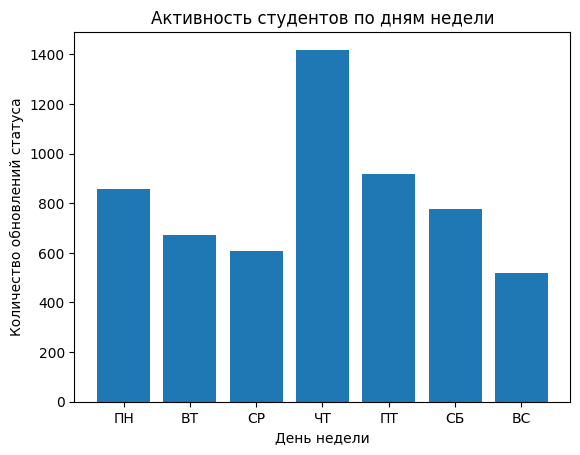

In [28]:
import csv
import datetime
import matplotlib.pyplot as plt


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')

def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


statuses = load_csv('statuses.csv')

day_counts = [0] * 7
for row in statuses:
    day_counts[parse_time(row[3]).weekday()] += 1

fig, ax = plt.subplots()
ax.bar(['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС'], day_counts)
ax.set_xlabel('День недели')
ax.set_ylabel('Количество обновлений статуса')
ax.set_title('Активность студентов по дням недели')
plt.show()

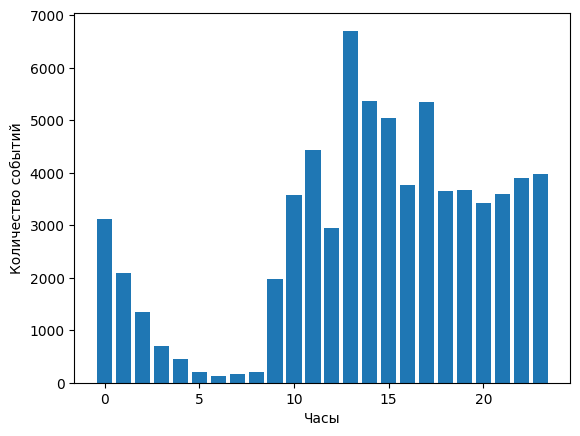

In [32]:
import csv
import datetime
from collections import Counter
import matplotlib.pyplot as plt

def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')

def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))

messages = load_csv('messages.csv')

checks = load_csv('checks.csv')

statuses = load_csv('statuses.csv')

hours = []

for message in messages:
    time = parse_time(message[4])
    hours.append(time.hour)

for check in checks:
    time = parse_time(check[2])
    hours.append(time.hour)

for status in statuses:
    time = parse_time(status[3])
    hours.append(time.hour)

hour_count = Counter(hours)

plt.bar(hour_count.keys(), hour_count.values())
plt.xlabel('Часы')
plt.ylabel('Количество событий')
plt.show()

In [33]:
from collections import defaultdict
import csv
import datetime

messages = load_csv('messages.csv')

task_message_counts = defaultdict(int)
for message in messages:
    task_message_counts[message[1]] += 1

average_messages_per_task = sum(task_message_counts.values()) / len(task_message_counts)

print("Среднее количество сообщений по каждой задаче: ", average_messages_per_task)

Среднее количество сообщений по каждой задаче:  3998.125


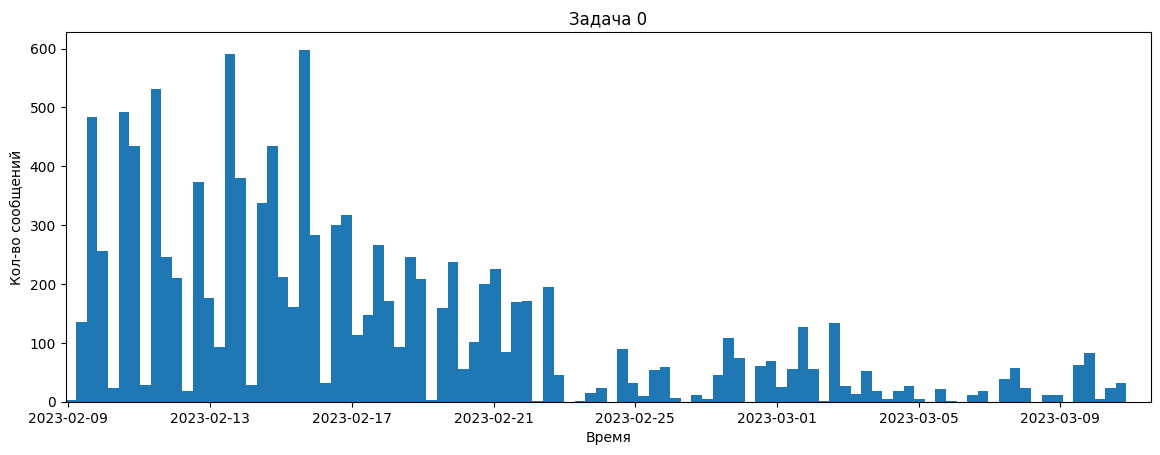

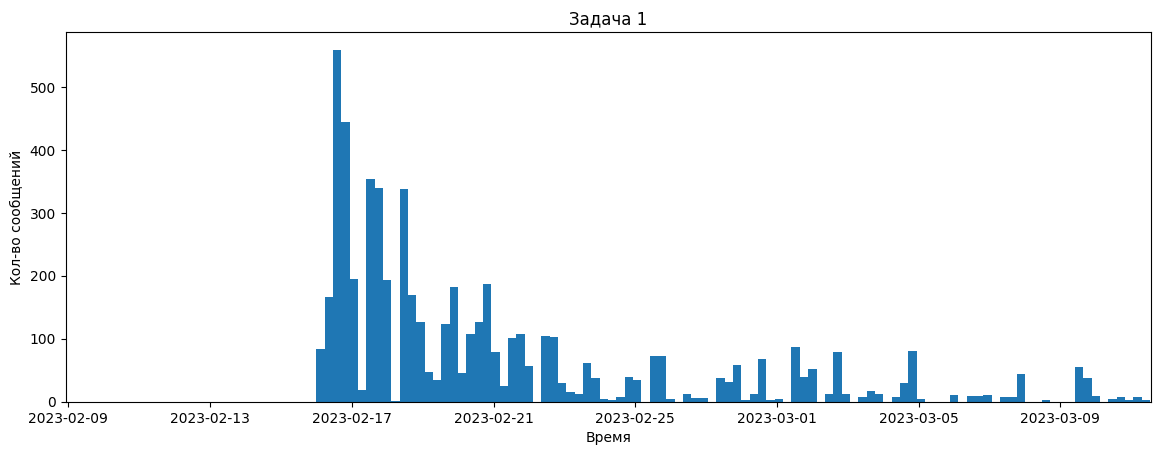

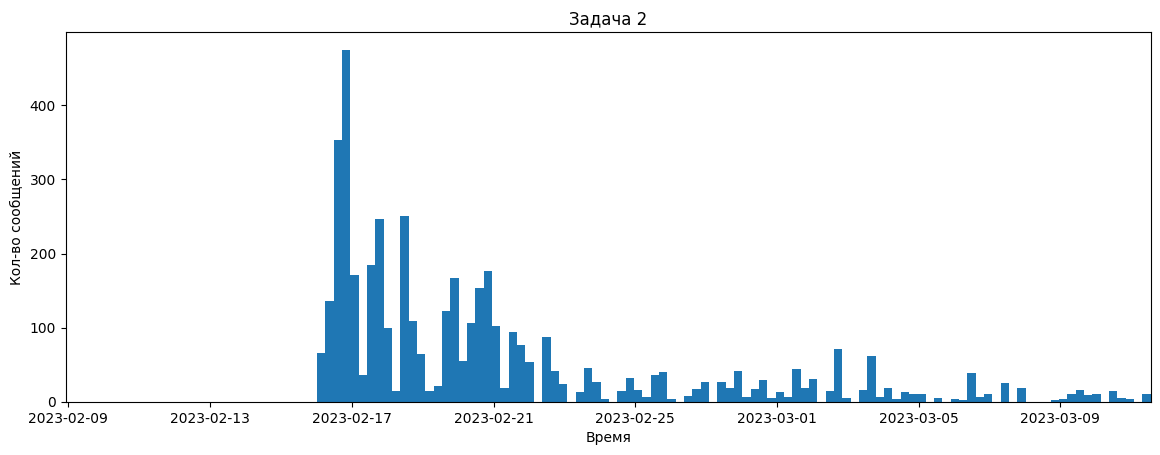

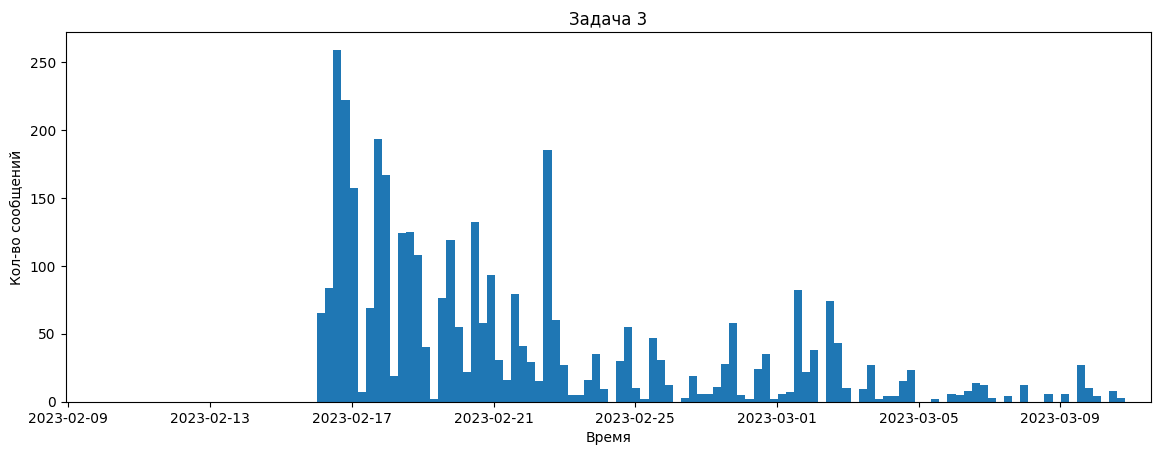

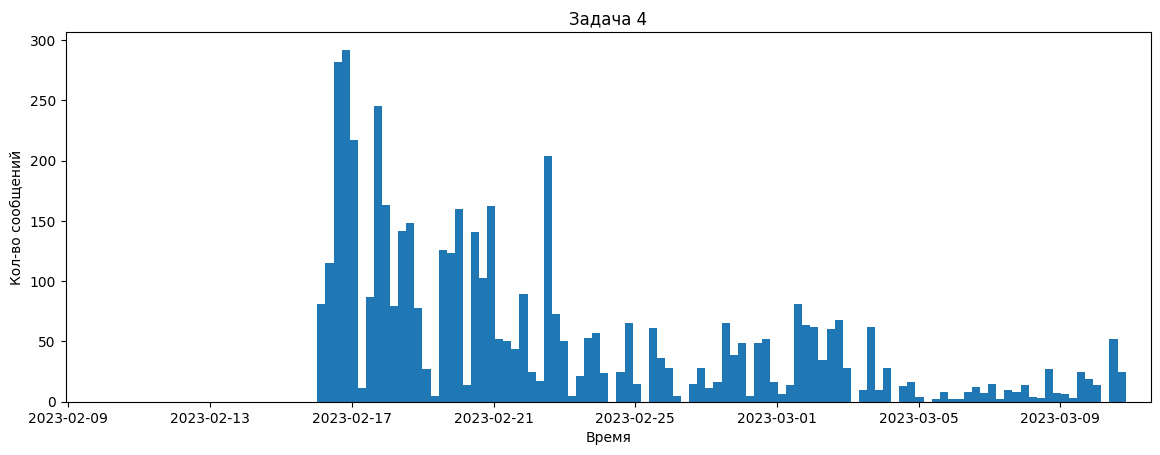

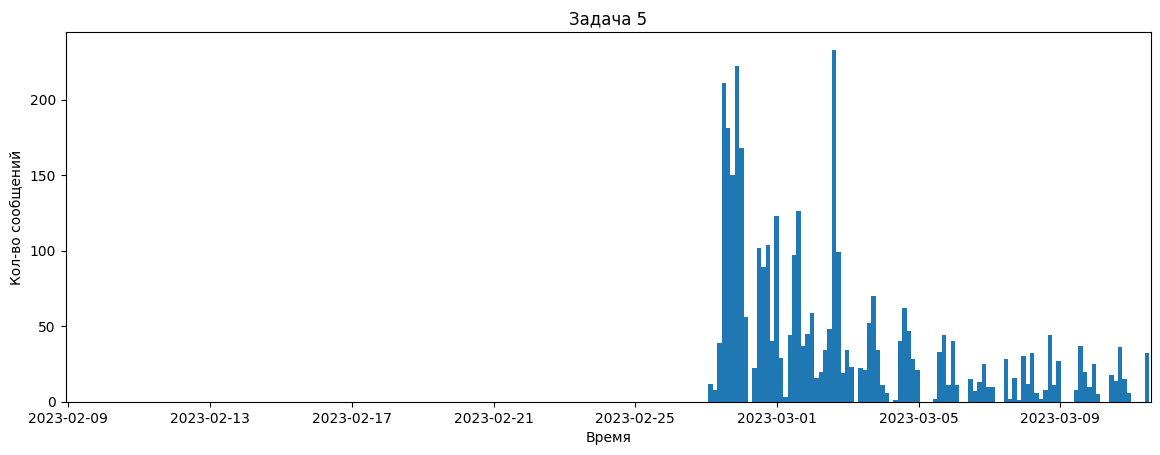

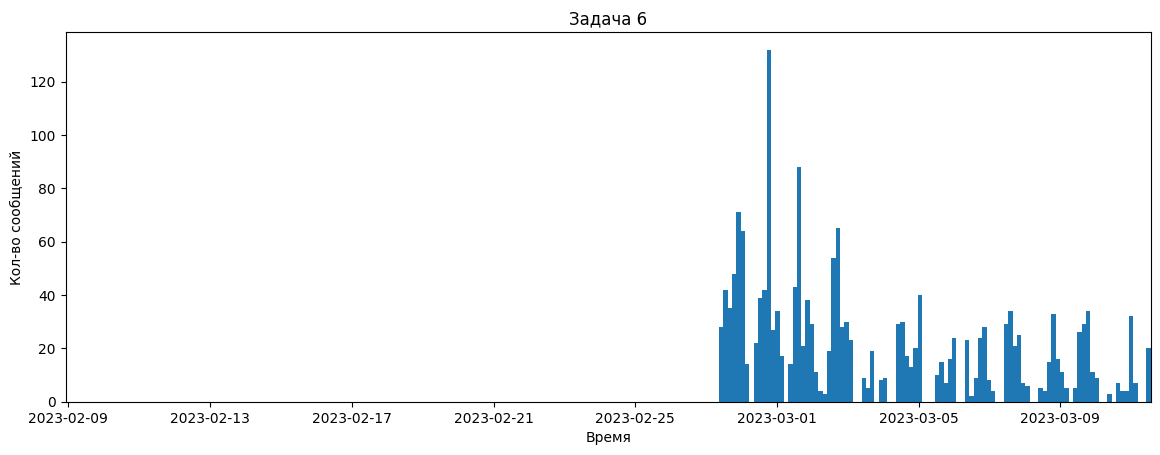

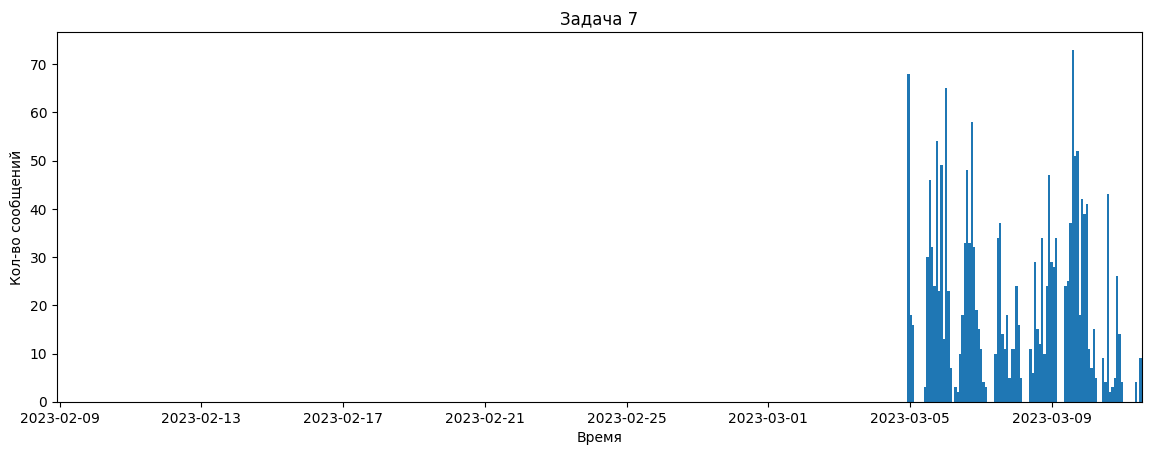

In [84]:
import csv
import datetime
import matplotlib.pyplot as plt

def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')

def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))

messages = load_csv('messages.csv')
checks = load_csv('checks.csv')
statuses = load_csv('statuses.csv')

start_date = min([parse_time(m[4]) for m in messages])
end_date = max([parse_time(m[4]) for m in messages])

task_activity = {}
for m in messages:
    task = m[1]
    time = parse_time(m[4])
    if task not in task_activity:
        task_activity[task] = []
    task_activity[task].append(time)
for c in checks:
    if int(c[3]) == 2:
        if int(c[1]) <= len(messages):
            task = messages[int(c[1])-1][1]
            for s in statuses:
                if s[0] == task and s[1] == c[2] and int(s[4]) == 3:
                    student = messages[int(c[1])-1][3]
                    if student not in task_activity[task]:
                        task_activity[task].append(student)
for s in statuses:
    task = s[0]
    time = parse_time(s[3])
    if task not in task_activity:
        task_activity[task] = []
    task_activity[task].append(time)

for task, times in task_activity.items():
    fig, ax = plt.subplots()
    ax.hist(times, bins=100)
    ax.set_xlim(start_date, end_date)
    ax.set_title('Задача ' + task)
    ax.set_xlabel('Время')
    ax.set_ylabel('Кол-во сообщений')
    fig.set_figwidth(14)
plt.show()

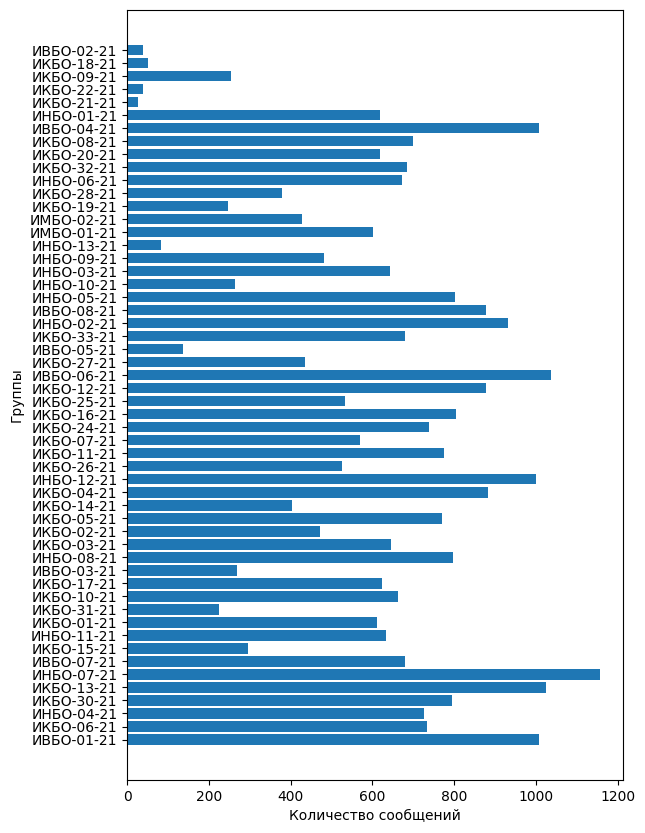

In [79]:
import csv
import matplotlib.pyplot as plt

with open('messages.csv', encoding='utf8') as f:
    messages = list(csv.reader(f, delimiter=','))

groups_count = {}
for message in messages:
    group = message[3]
    if group in groups_count:
        groups_count[group] += 1
    else:
        groups_count[group] = 1

fig, ax = plt.subplots()
fig.set_figheight(10)
plt.barh(list(groups_count.keys()), list(groups_count.values()))
plt.ylabel('Группы')
plt.xlabel('Количество сообщений')
plt.show()

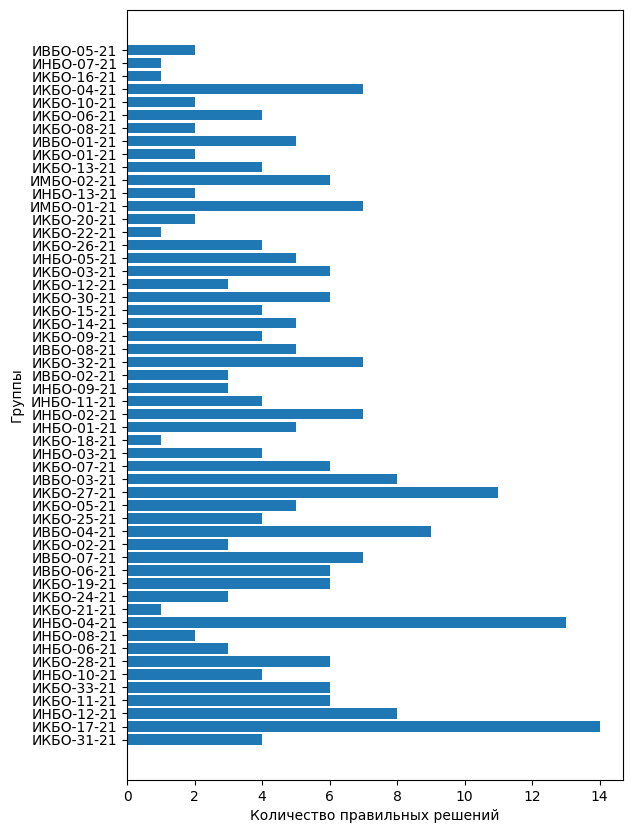

In [6]:
import csv
import matplotlib.pyplot as plt

statuses = {}

with open('statuses.csv', encoding='utf8') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        group = row[2]
        status = int(row[4])
        if status == 3:
            if group not in statuses:
                statuses[group] = 0
            statuses[group] += 1

fig, ax = plt.subplots()
fig.set_figheight(10)
ax.barh(list(statuses.keys()), list(statuses.values()))
ax.set_ylabel('Группы')
ax.set_xlabel('Количество правильных решений')
plt.show()

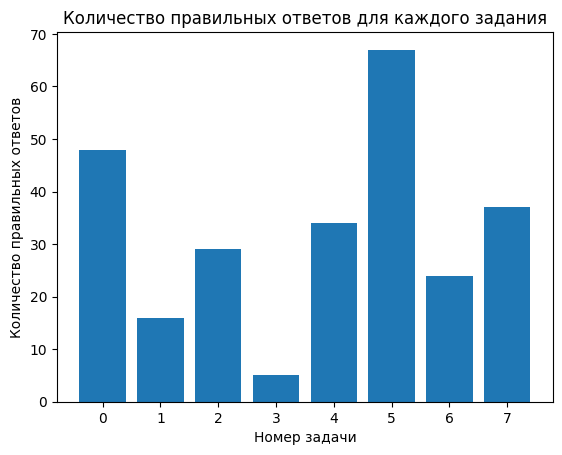

Лёгкая задача: 5
Сложная задача: 3


In [10]:
import csv
import matplotlib.pyplot as plt

def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))

statuses = load_csv('statuses.csv')

correct_answers = {}

for row in statuses:
    task = row[0]
    status = int(row[4])
    if status == 3:
        if task in correct_answers:
            correct_answers[task] += 1
        else:
            correct_answers[task] = 1

tasks = []
num_correct = []
for task, num in correct_answers.items():
    tasks.append(int(task))
    num_correct.append(num)

tasks, num_correct = zip(*sorted(zip(tasks, num_correct), key=lambda x: x[1], reverse=True))

plt.bar(tasks, num_correct)
plt.xlabel('Номер задачи')
plt.ylabel('Количество правильных ответов')
plt.title('Количество правильных ответов для каждого задания')
plt.show()

print(f"Лёгкая задача: {tasks[0]}")
print(f"Сложная задача: {tasks[-1]}")

Топ 10 групп по достижениям:
ИНБО-07-21: 278
ИКБО-16-21: 183
ИКБО-24-21: 178
ИВБО-06-21: 177
ИВБО-04-21: 175
ИКБО-01-21: 169
ИКБО-03-21: 166
ИКБО-13-21: 163
ИНБО-02-21: 158
ИКБО-10-21: 156


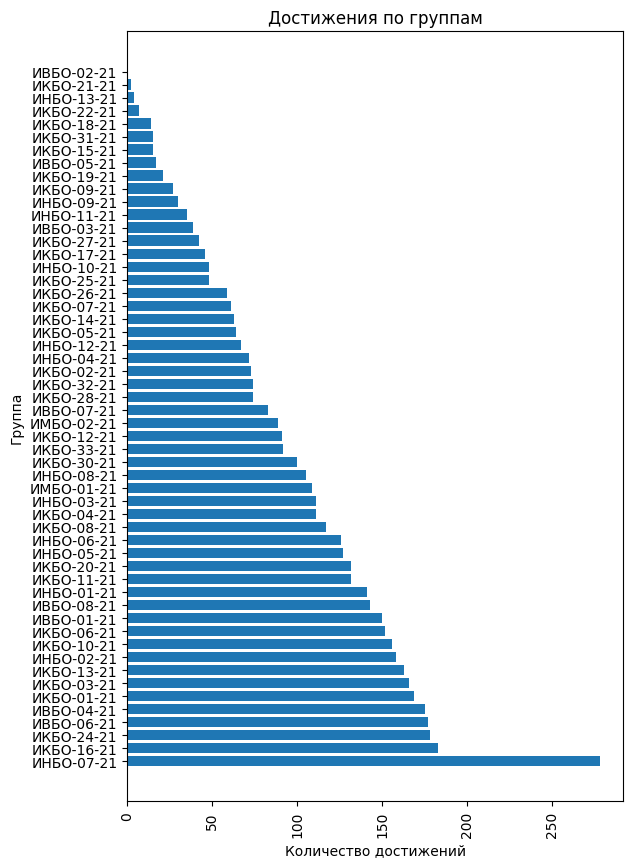

In [13]:
import csv
import datetime
from collections import defaultdict
import matplotlib.pyplot as plt


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


statuses = load_csv('statuses.csv')

group_achievements = defaultdict(int)
for status in statuses:
    group = status[2]
    achievements = eval(status[5])
    group_achievements[group] += sum(achievements)

sorted_groups = sorted(group_achievements.items(), key=lambda x: x[1], reverse=True)

print('Топ 10 групп по достижениям:')
for group, achievements in sorted_groups[:10]:
    print(f'{group}: {achievements}')

groups = [group for group, _ in sorted_groups]
achievements = [achievements for _, achievements in sorted_groups]
fig, ax = plt.subplots()
fig.set_figheight(10)
plt.barh(list(groups), list(achievements))
plt.xticks(rotation=90)
plt.ylabel('Группа')
plt.xlabel('Количество достижений')
plt.title('Достижения по группам')
plt.show()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df_messages = pd.read_csv('statuses.csv', header=None, names=['task', 'variant', 'group', 'time', 'status', 'achievements'])

df_correct = df_messages.groupby('group').achievements.nunique().reset_index()

df_sorted = df_correct.sort_values('achievements', ascending=False)

top_10 = df_sorted.head(10)
print(top_10)

         group  achievements
47  ИНБО-07-21            18
3   ИВБО-04-21            17
0   ИВБО-01-21            15
10  ИКБО-03-21            15
23  ИКБО-16-21            15
42  ИНБО-02-21            15
5   ИВБО-06-21            14
20  ИКБО-13-21            13
30  ИКБО-24-21            13
40  ИМБО-02-21            11


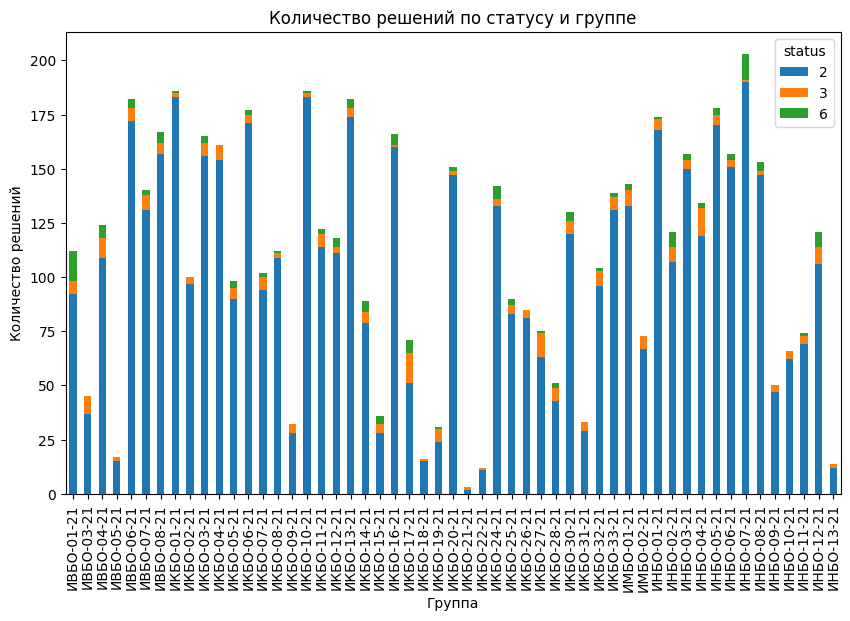

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

statuses_df = pd.read_csv('statuses.csv', header=None, names=['task', 'variant', 'group', 'time', 'status', 'achievements'])

grouped = statuses_df.groupby(['group', 'status']).size().reset_index(name='counts')

grouped = grouped[grouped.groupby('group').transform('count')['status'] > 1]

pivot_table = pd.pivot_table(grouped, values='counts', index='group', columns='status', fill_value=0)

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Количество решений по статусу и группе')
plt.xlabel('Группа')
plt.ylabel('Количество решений')

plt.show()

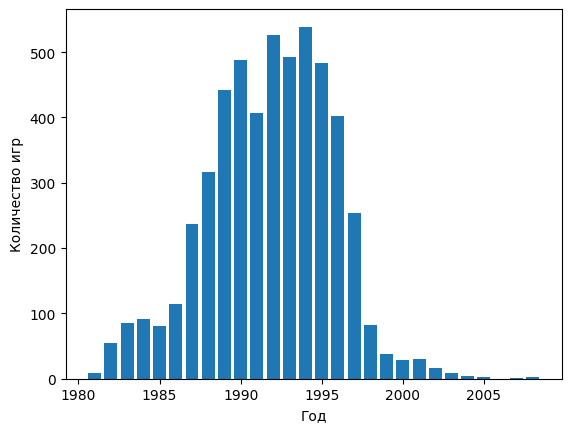

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('games.csv', sep=';', header=None, names=['name', 'genre', 'url', 'year'])

data['year'] = pd.to_datetime(data['year'], format='%Y', errors='coerce')

data = data.dropna(subset=['year'])

year_counts = data['year'].dt.year.value_counts()

plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

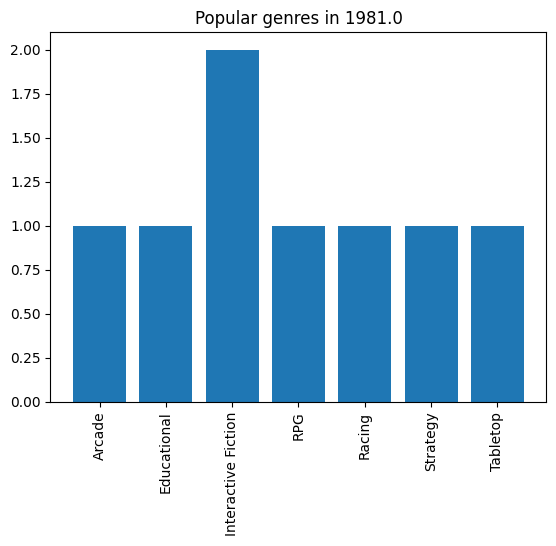

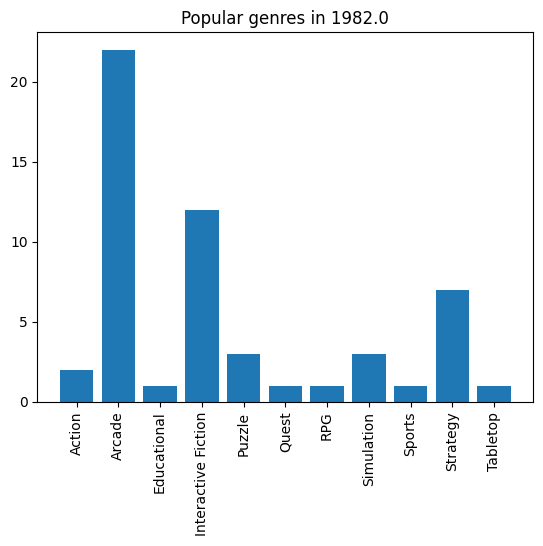

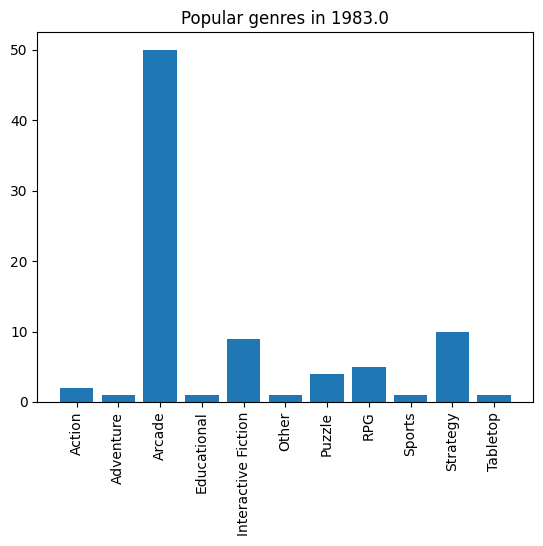

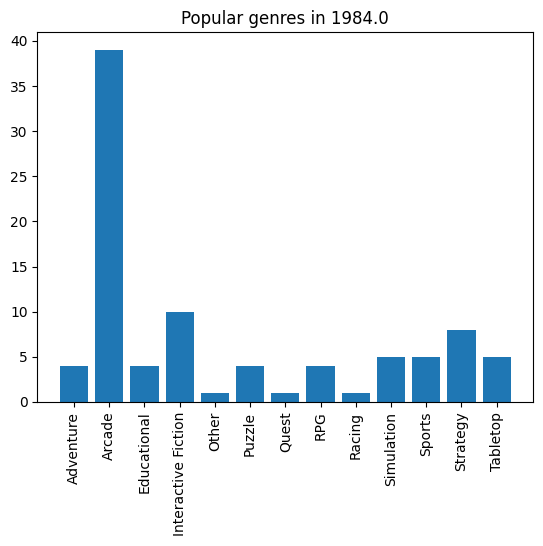

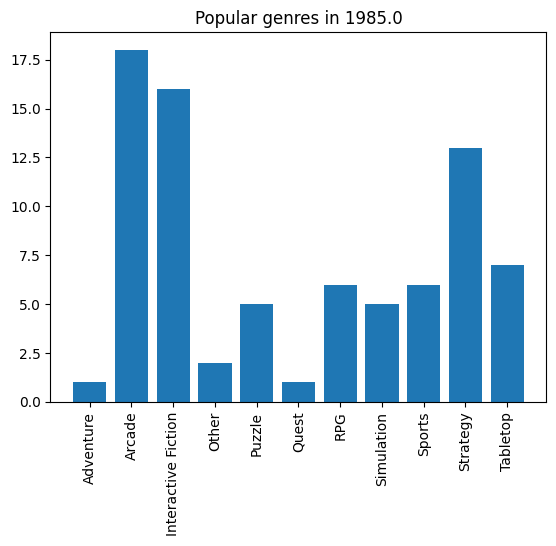

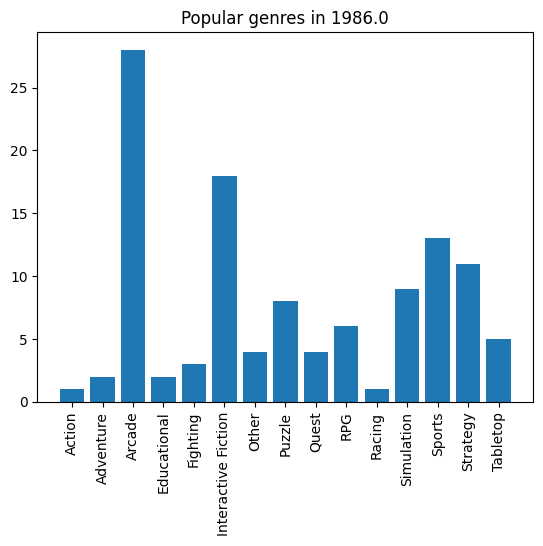

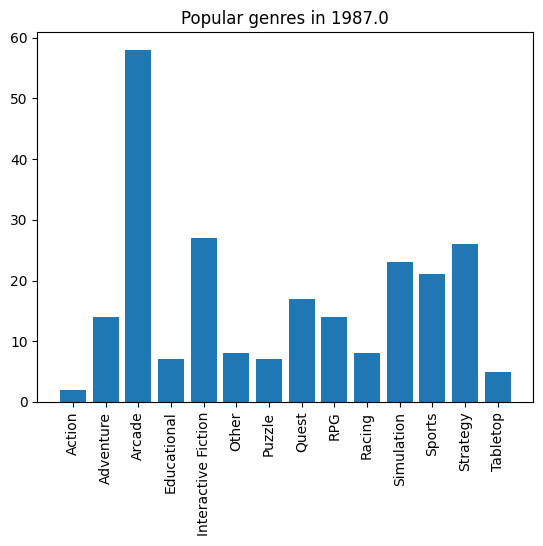

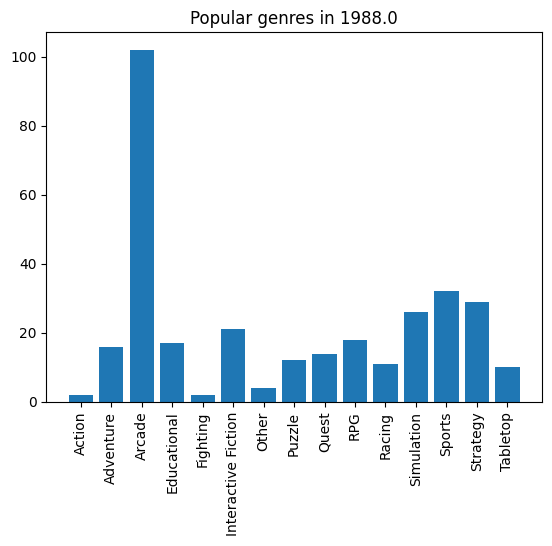

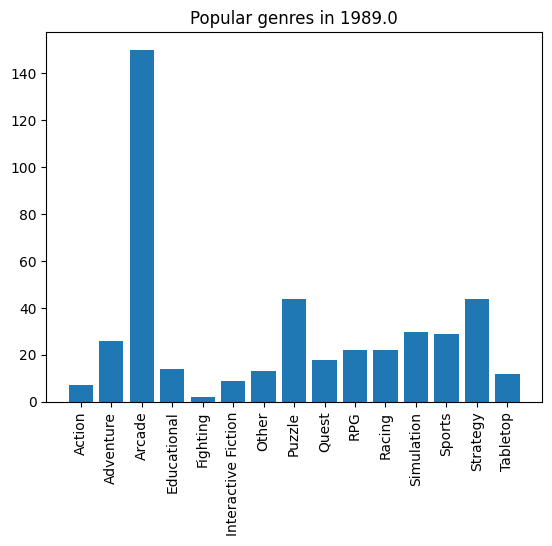

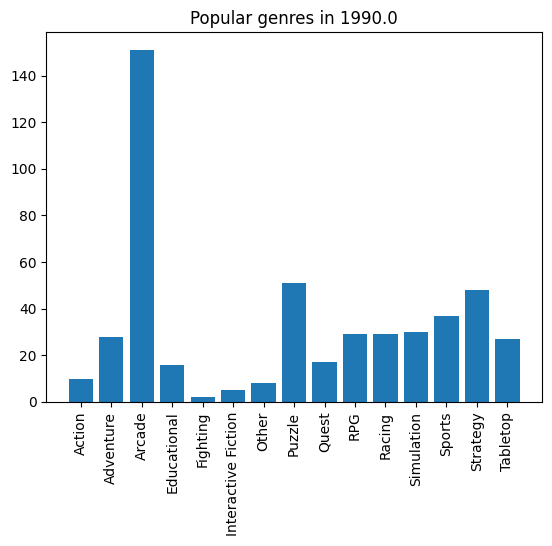

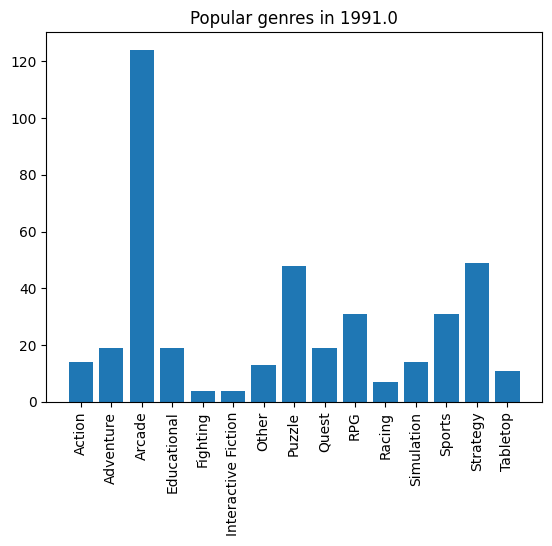

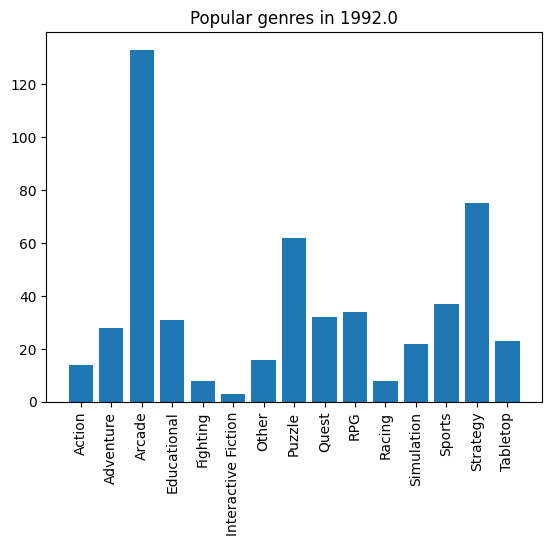

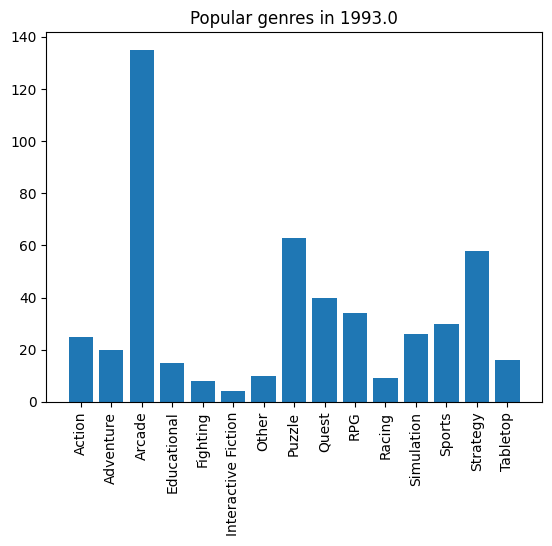

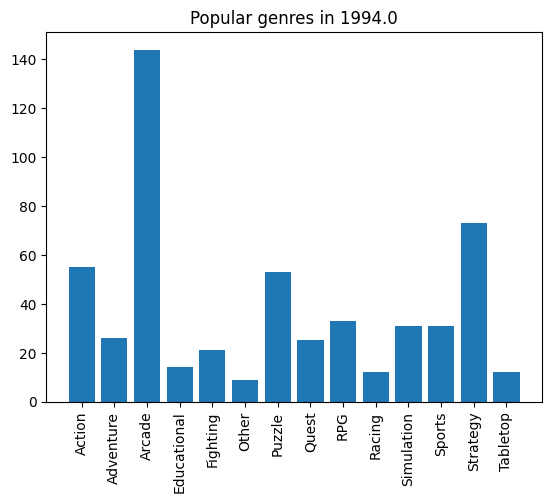

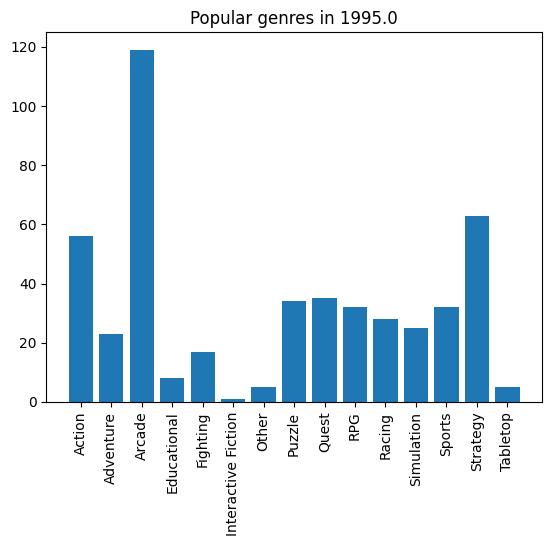

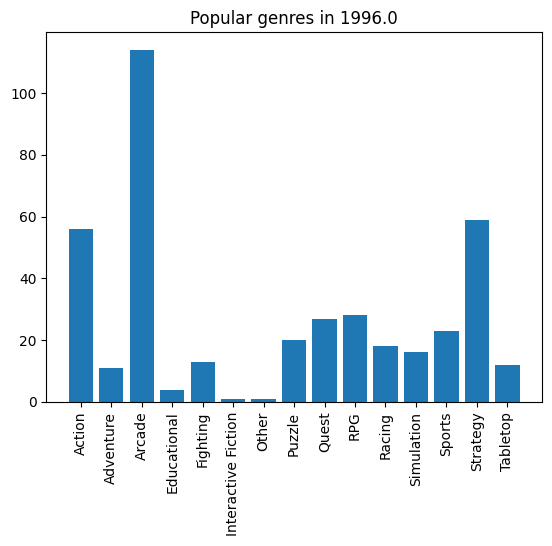

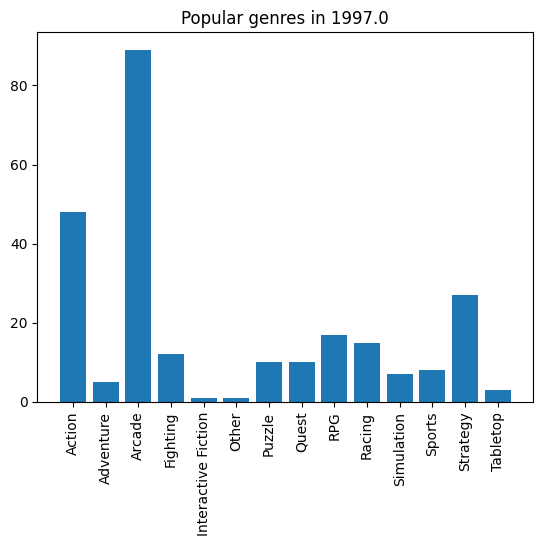

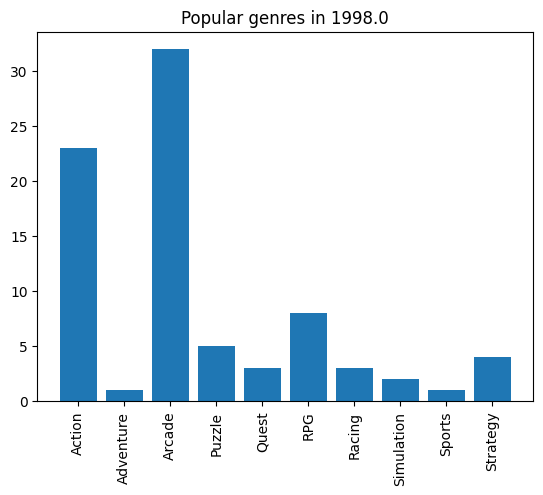

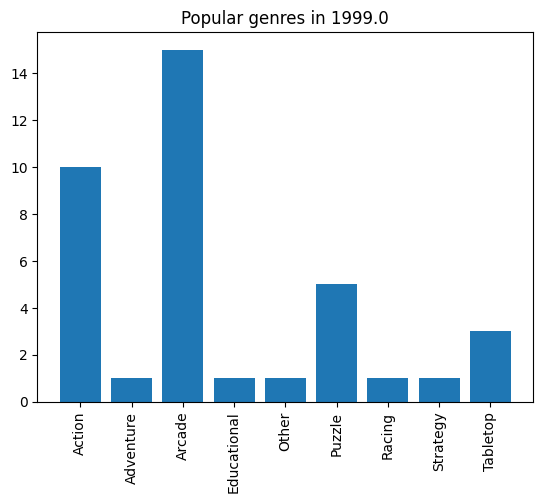

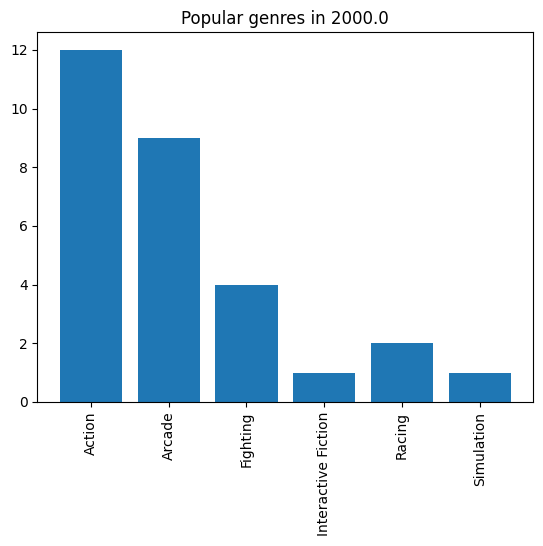

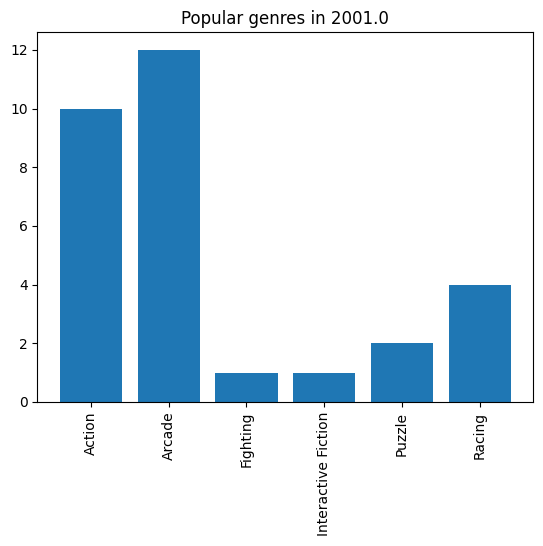

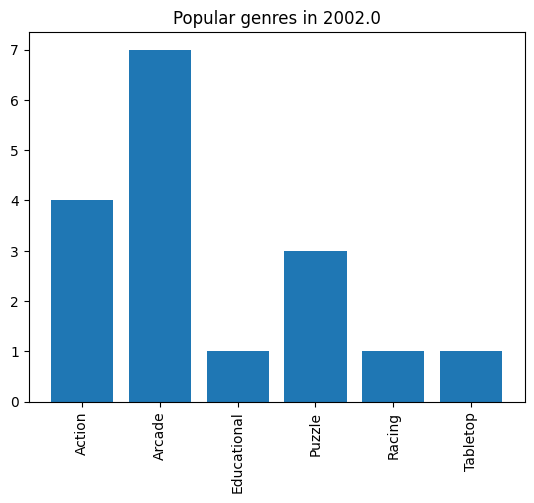

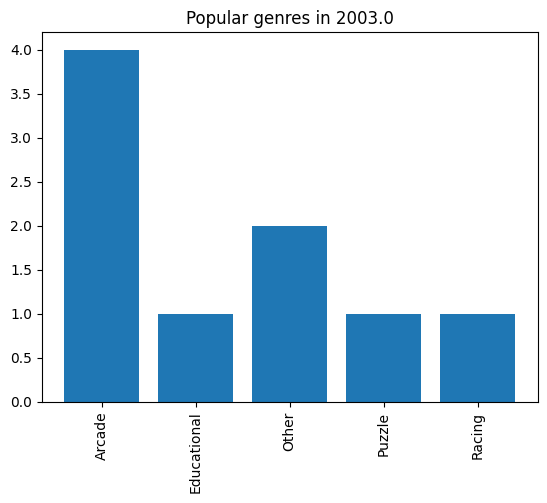

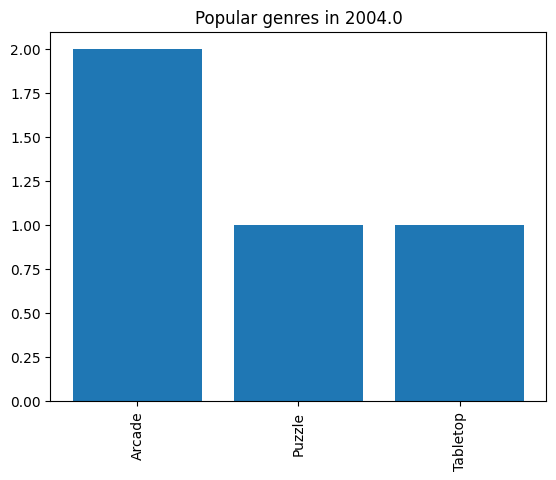

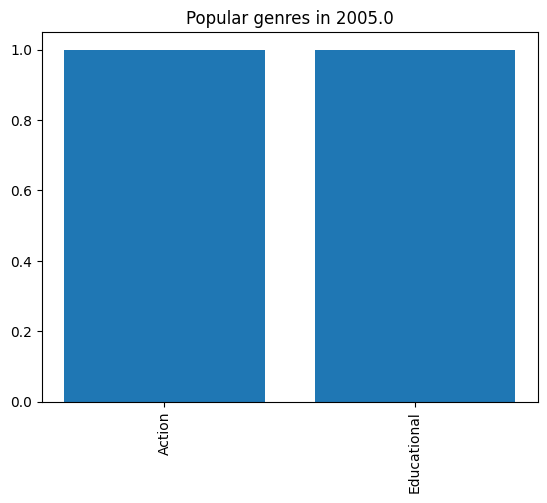

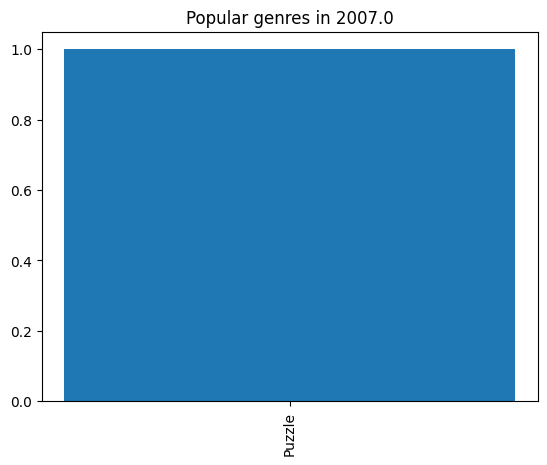

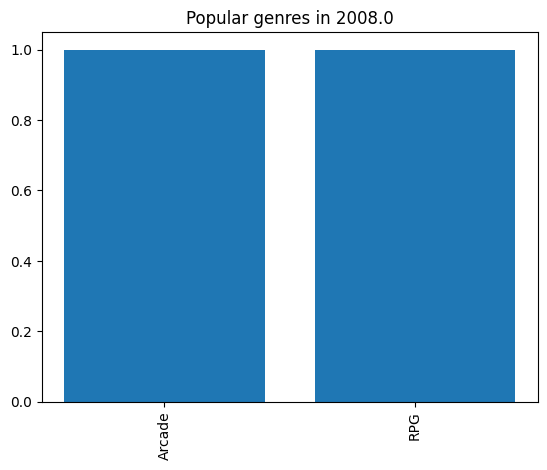

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games.csv', delimiter=';', header=None, names=['title', 'genre', 'link', 'year'])

df['year'] = pd.to_numeric(df['year'], errors='coerce')

grouped = df.groupby(['year', 'genre']).size().reset_index(name='count')

for year in grouped['year'].unique():
    year_data = grouped[grouped['year'] == year]
    plt.figure()
    plt.title(f'Popular genres in {year}')
    plt.bar(year_data['genre'], year_data['count'])
    plt.xticks(rotation=90)
    plt.show()